# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



In [10]:
%%html
<link rel="stylesheet" href="style/style.css">

In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import prim, scenario_discovery_util
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div class="analysis">
    PRIM, Patient Rule Induction Method, identifies interesting regions in the model input space. It is therefore frequently used for scenario discovery. A region is deemed interesting if it can produce outcomes of interest. Outcomes of interest are determined by the objective function. The density, the fraction of cases of interesting, is passed as an argument to the PRIM algorithm. Boxes need to meet that criterium. Note that it is therefore also a metric. 
</div>

# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [1]:
data = pd.read_csv('data/Bryant et al 2010.csv')

data

renew req %  Pricing  Cellulosic cost  Total biomass  \
0           0.25        1       124.900001     612.799988   
1           0.25        1        67.300003     837.200012   
2           0.25        1        71.000000     740.400024   
3           0.25        1        80.099998     995.599976   
4           0.25        1        76.400002     476.399994   
..           ...      ...              ...            ...   
877         0.25        1        99.199997     511.600006   
878         0.25        1       102.400002     751.400024   
879         0.25        1       100.000000     527.000000   
880         0.25        1       108.300003     694.200012   
881         0.25        1       121.099999     588.599976   

     Feedstock distribution  Cellulosic yield  Oil elasticity  \
0                      0.04         89.500000           0.206   
1                      0.18         95.900002           0.277   
2                      0.80         83.500000           0.445   
3                      0.58         82.400002           0.291   
4                      0.79         97.500000           0.443   
..                      ...               ...             ...   
877                    0.45         89.099998           0.363   
878                    0.91         86.800003           0.318   
879                    0.59         91.099998           0.410   
880                    0.65         99.800003           0.355   
881                    0.35         94.599998           0.283   

     Demand elasticity  Electricity coproduction  oil supply shift  \
0               -0.469                      1.83             0.078   
1               -0.380                      0.01            -0.032   
2               -0.778                      0.25            -0.093   
3               -0.334                      0.08            -0.086   
4               -0.205                      1.59             0.073   
..                 ...                       ...               ...   
877             -0.387                      1.75            -0.015   
878             -0.471                      0.75             0.023   
879             -0.567                      0.22             0.062   
880             -0.368                      1.62             0.017   
881             -0.332                      1.18            -0.007   

     Biomass backstop price  input record  Expen change  Incremental cost  \
0                162.199997          1001         60.00            276.47   
1                150.300003          1002         19.42             85.07   
2                135.800003          1003         17.76            200.11   
3                 98.800003          1004         37.88            130.86   
4                163.500000          1006         66.13            180.11   
..                      ...           ...           ...               ...   
877              170.500000          1995         74.22            265.56   
878               96.199997          1996         35.97            163.70   
879              137.100006          1997         35.96            200.64   
880              145.399994          1998         41.42            126.74   
881              124.300003          1999         62.17            207.96   

     Less than 10%  Greater than 90%  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 0  
4                0                 0  
..             ...               ...  
877              0                 0  
878              0                 0  
879              0                 0  
880              0                 0  
881              0                 0  

[882 rows x 16 columns]

<div class="analysis">
The PRIM alogrithm consists out of at lest the following stage:
    
- Recursive peeling: get a box as small as possible (with interesting data points) (so peeling stops when the density becomes smaller than the threshold)
    
The next stage is optional, but we have consciously included it in all our applications:
    
- Pasting stage: making corrections to the recursive peeling (in case too much data has been culled)
</div>

In [2]:
# 9 uncertainties = columns 2-10
x = data.iloc[:, 2:11]

# results =  column 15
y = data.iloc[:, 15]

# 79% coverage and 73% density
# Threshold is defined in terms of density
# what is the alpha? Can't find it on the stupid paper. Used 0.09 because that is the one that gives me 31 points as in the paper but where the hell would I find that?

prim_alg = prim.Prim(x, y, threshold=0.73, peel_alpha=0.09)
box1 = prim_alg.find_box()

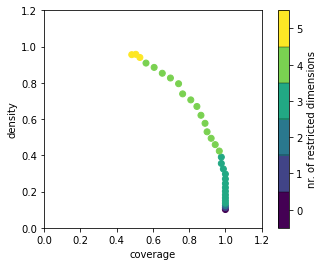

In [3]:
import matplotlib.pyplot as plt

box1.show_tradeoff()
plt.show()

<div class="analysis">
    One can see in the graph the diminishing impacts of coverage vs density. Point 1 (bottom right) has coverage of 1 and very low density, because it is the entirety of the space. Subsequent points still have a coverage of 1 but more density, as empty space is being chopped by the peeling process. Later on, the peeling process does start to chop off some of the results so coverage starts to decrease while density is still increasing. The peeling alpha is the parameter that defines how much is peeled in each step, and it depends on the problem, some models will work only with lower alpha values while some others will already work with bigger ones and making it smaller only wastes time.
</div>

coverage    0.842697
density     0.669643
id                21
mass        0.126984
mean        0.669643
res_dim            4
Name: 21, dtype: object

                            box 21                                           
                               min         max                      qp values
Total biomass           450.000000  786.600006  [-1.0, 7.195417582521616e-06]
Demand elasticity        -0.446000   -0.202000  [3.504693757629083e-17, -1.0]
Biomass backstop price  141.049995  199.600006  [1.452600844284626e-10, -1.0]
Cellulosic cost          71.950001  133.699997    [0.15135923800935056, -1.0]



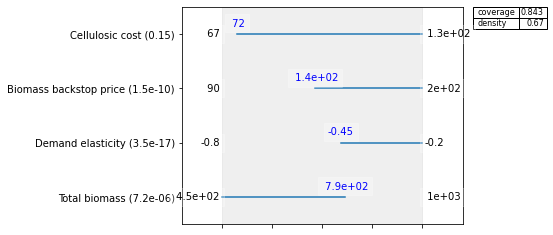

In [4]:
# From fig. 3 we see that Scenario A is #21

box1.inspect(21)
box1.inspect(21,style='graph')
plt.show()

<div class="analysis">
    This result very closely matches the one in the paper.
</div>

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [1]:
data_rozenberg = pd.read_csv('data/Rozenberg et al 2014.csv')
print('shape of data:', data_rozenberg.shape)
data_rozenberg.head()

shape of data: (286, 12)


inequalities  convergence  population  behaviors  technologies  fossils  \
0             0            2           0          0             0        0   
1             0            2           0          0             0        0   
2             0            2           0          0             0        1   
3             0            2           0          0             0        1   
4             0            2           0          0             1        0   

   capital markets  SSP1  SSP2  SSP3  SSP4  SSP5  
0                0     0     0     0     0     0  
1                1     0     0     0     0     0  
2                0     0     0     0     0     0  
3                1     0     0     0     0     0  
4                0     0     1     0     0     0

In [85]:
#prim.prim needs a 1D array witht he outcome/dependent variable\n",
#Time to split up the df\n",

#SSP1\n",


def prim_analyse(df, ssp,treshold_value):
    #Take the first 7 as experiments
    x = df.loc[:, 'inequalities': 'capital markets']
    
    #Take the last SSP as outcome
    y = df[ssp]
    y.reset_index(drop = True, inplace = True)
    y.name = ssp
    y_series = y.squeeze()
    prim_alg = prim.Prim(x, y_series, threshold=treshold_value, peel_alpha=0.1)
    boxA = prim_alg.find_box()
    prim_alg.show_boxes()
    boxA.show_tradeoff()
    boxA.show_pairs_scatter()
    print(prim_alg.boxes_to_dataframe())
    print(prim_alg.stats_to_dataframe())
    plt.show()

             box 1     
               min  max
population     0.0  0.0
behaviors      0.0  0.0
inequalities   1.0  1.0
convergence    0.0  1.0
       coverage  density      mass  res_dim
box 1  0.321429   0.5625  0.055944        4


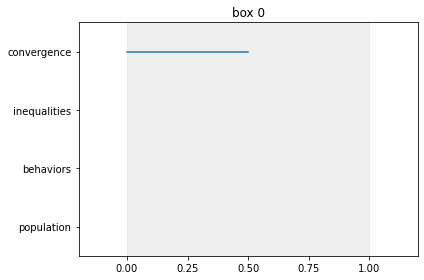

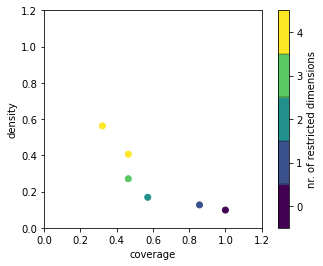

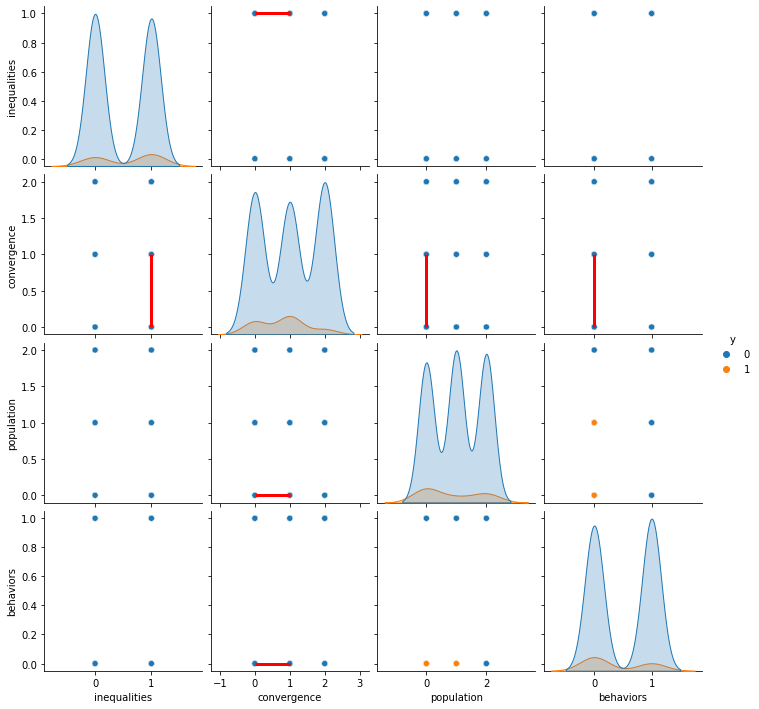

In [87]:
#prim_analyse(data_rozenberg, 'SSP1', 0.8)
prim_analyse(data_rozenberg, 'SSP2', 0.5)
#prim_analyse(data_rozenberg, 'SSP3', 0.8)
#prim_analyse(data_rozenberg, 'SSP4', 0.8)
#prim_analyse(data_rozenberg, 'SSP5', 0.4)


<div class="analysis">
    
- PRIM is used on different subsamples of the dataset, and notes the fraction of subsamples for which each parameter emerges as an import driver of the scenario definition.,

- Greater then 50% means significant

- Coverage/Denisty was rounded to 5% and explains how much of the values in the area (figure 3) are according to the results)

</div>

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [2]:
experiments, outcomes = load_results("data/Hamarat et al 2013.gz")

In [3]:
data = outcomes["fraction renewables"]

In [4]:
difference = pd.Series([a[-1] - a[0] for a in data])

## PRIM

In [5]:
iterations = 3

In [6]:
boxes = []
prim_algs = []
for threshold in np.arange(0,0.3,0.1):
    prim_alg = prim.Prim(experiments, difference < 0, threshold=threshold)
    prim_algs.append(prim_alg)
    temp = []
    for iteration in range(iterations):
        temp.append(prim_alg.find_box())
    boxes.append(temp)

In [17]:
for box in boxes:
    print('\033[1m' + "Box" + '\033[0m')
    i = 0
    for iteration in box:
        print("\n Iteration", i)
        i+= 1
        print("Coverage: ", iteration.coverage)
        print("Dimensions used: ", iteration.res_dim)

Box

 Iteration 0
Coverage:  0.0524
Dimensions used:  12

 Iteration 1
Coverage:  0.0518
Dimensions used:  12

 Iteration 2
Coverage:  0.0532
Dimensions used:  10
Box

 Iteration 0
Coverage:  0.22043628013777267
Dimensions used:  12

 Iteration 1
Coverage:  0.1653272101033295
Dimensions used:  12

 Iteration 2
Coverage:  0.13318025258323765
Dimensions used:  10
Box

 Iteration 0
Coverage:  0.22043628013777267
Dimensions used:  12

 Iteration 1
Coverage:  0.1653272101033295
Dimensions used:  12

 Iteration 2
Coverage:  0.13318025258323765
Dimensions used:  10


<div class="analysis">
    Analysis
</div>

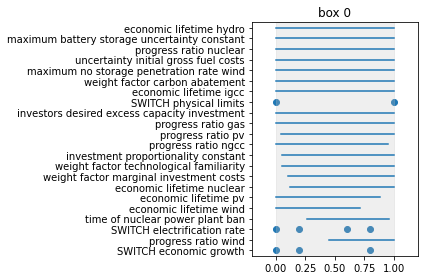

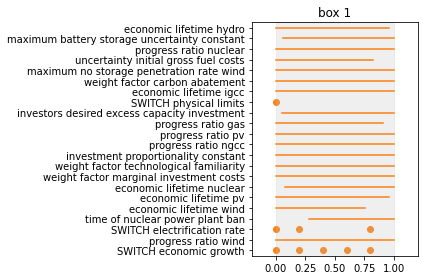

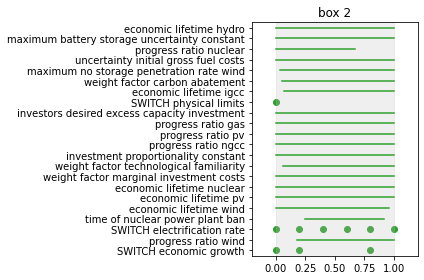

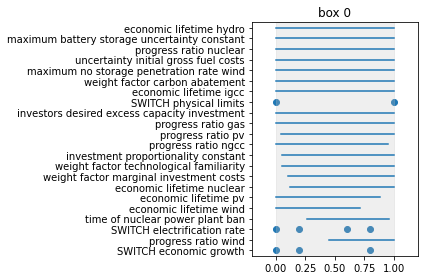

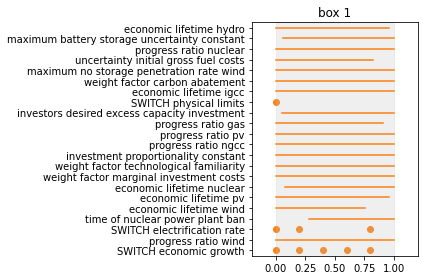

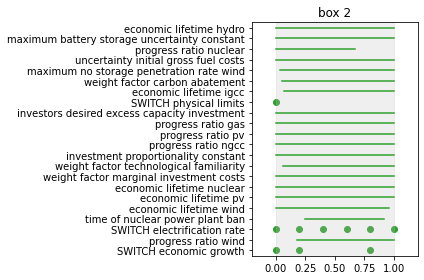

In [34]:
for alg in prim_algs[:2]:
    prim_alg.show_boxes()

<div class="analysis">
    Analysis
</div>

Box


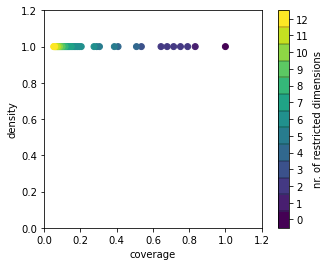

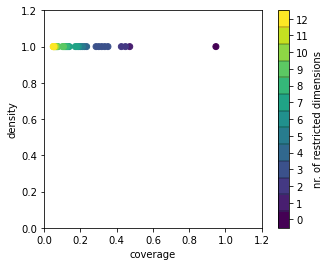

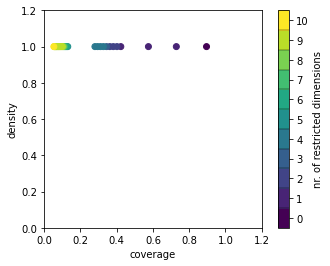

Box


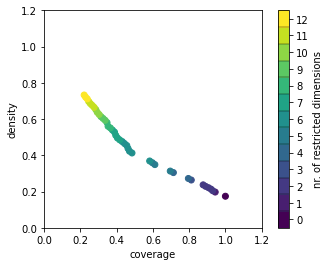

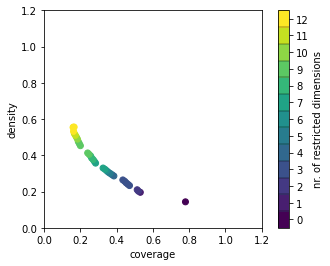

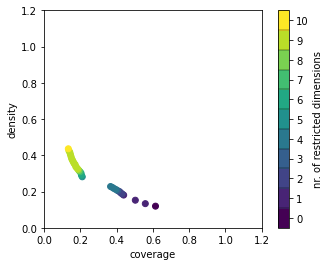

Box


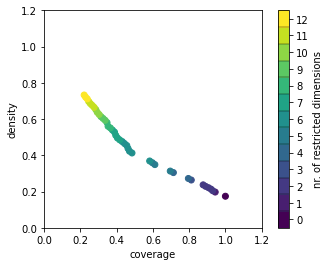

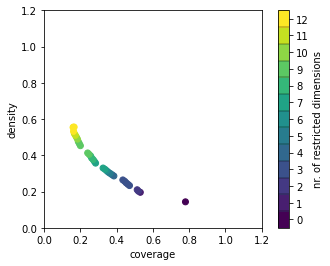

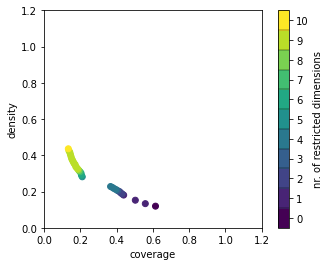

In [35]:
for box in boxes[:3]:
    print("Box")
    for iteration in box:
        iteration.show_tradeoff()
        plt.show()

<div class="analysis">
    Analysis
</div>

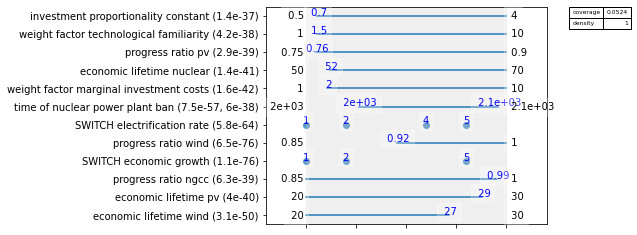

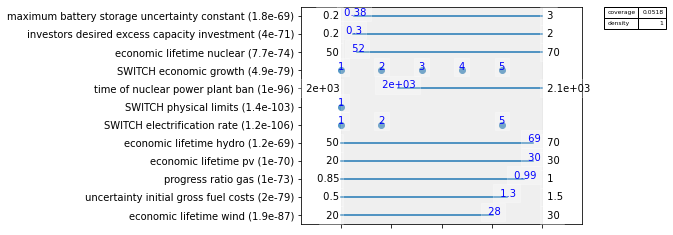

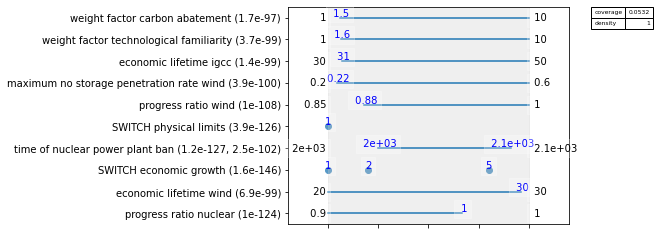

In [36]:
for i in range(3):
    boxes[0][i].inspect(style='graph')
    plt.show()

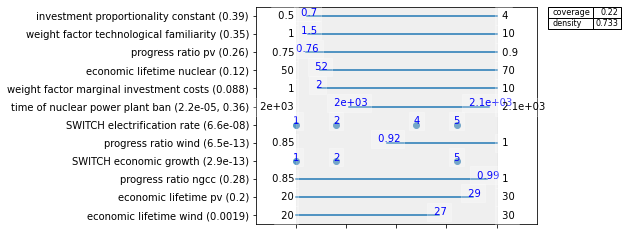

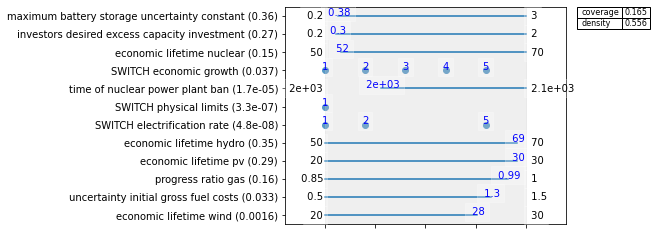

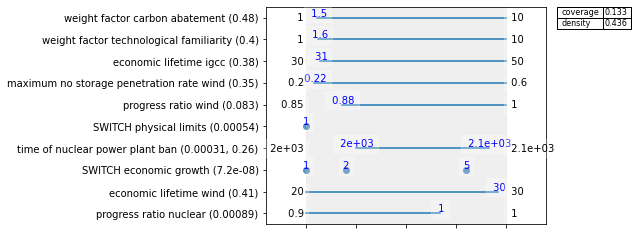

In [37]:
for i in range(3):
    boxes[1][i].inspect(style='graph')
    plt.show()

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


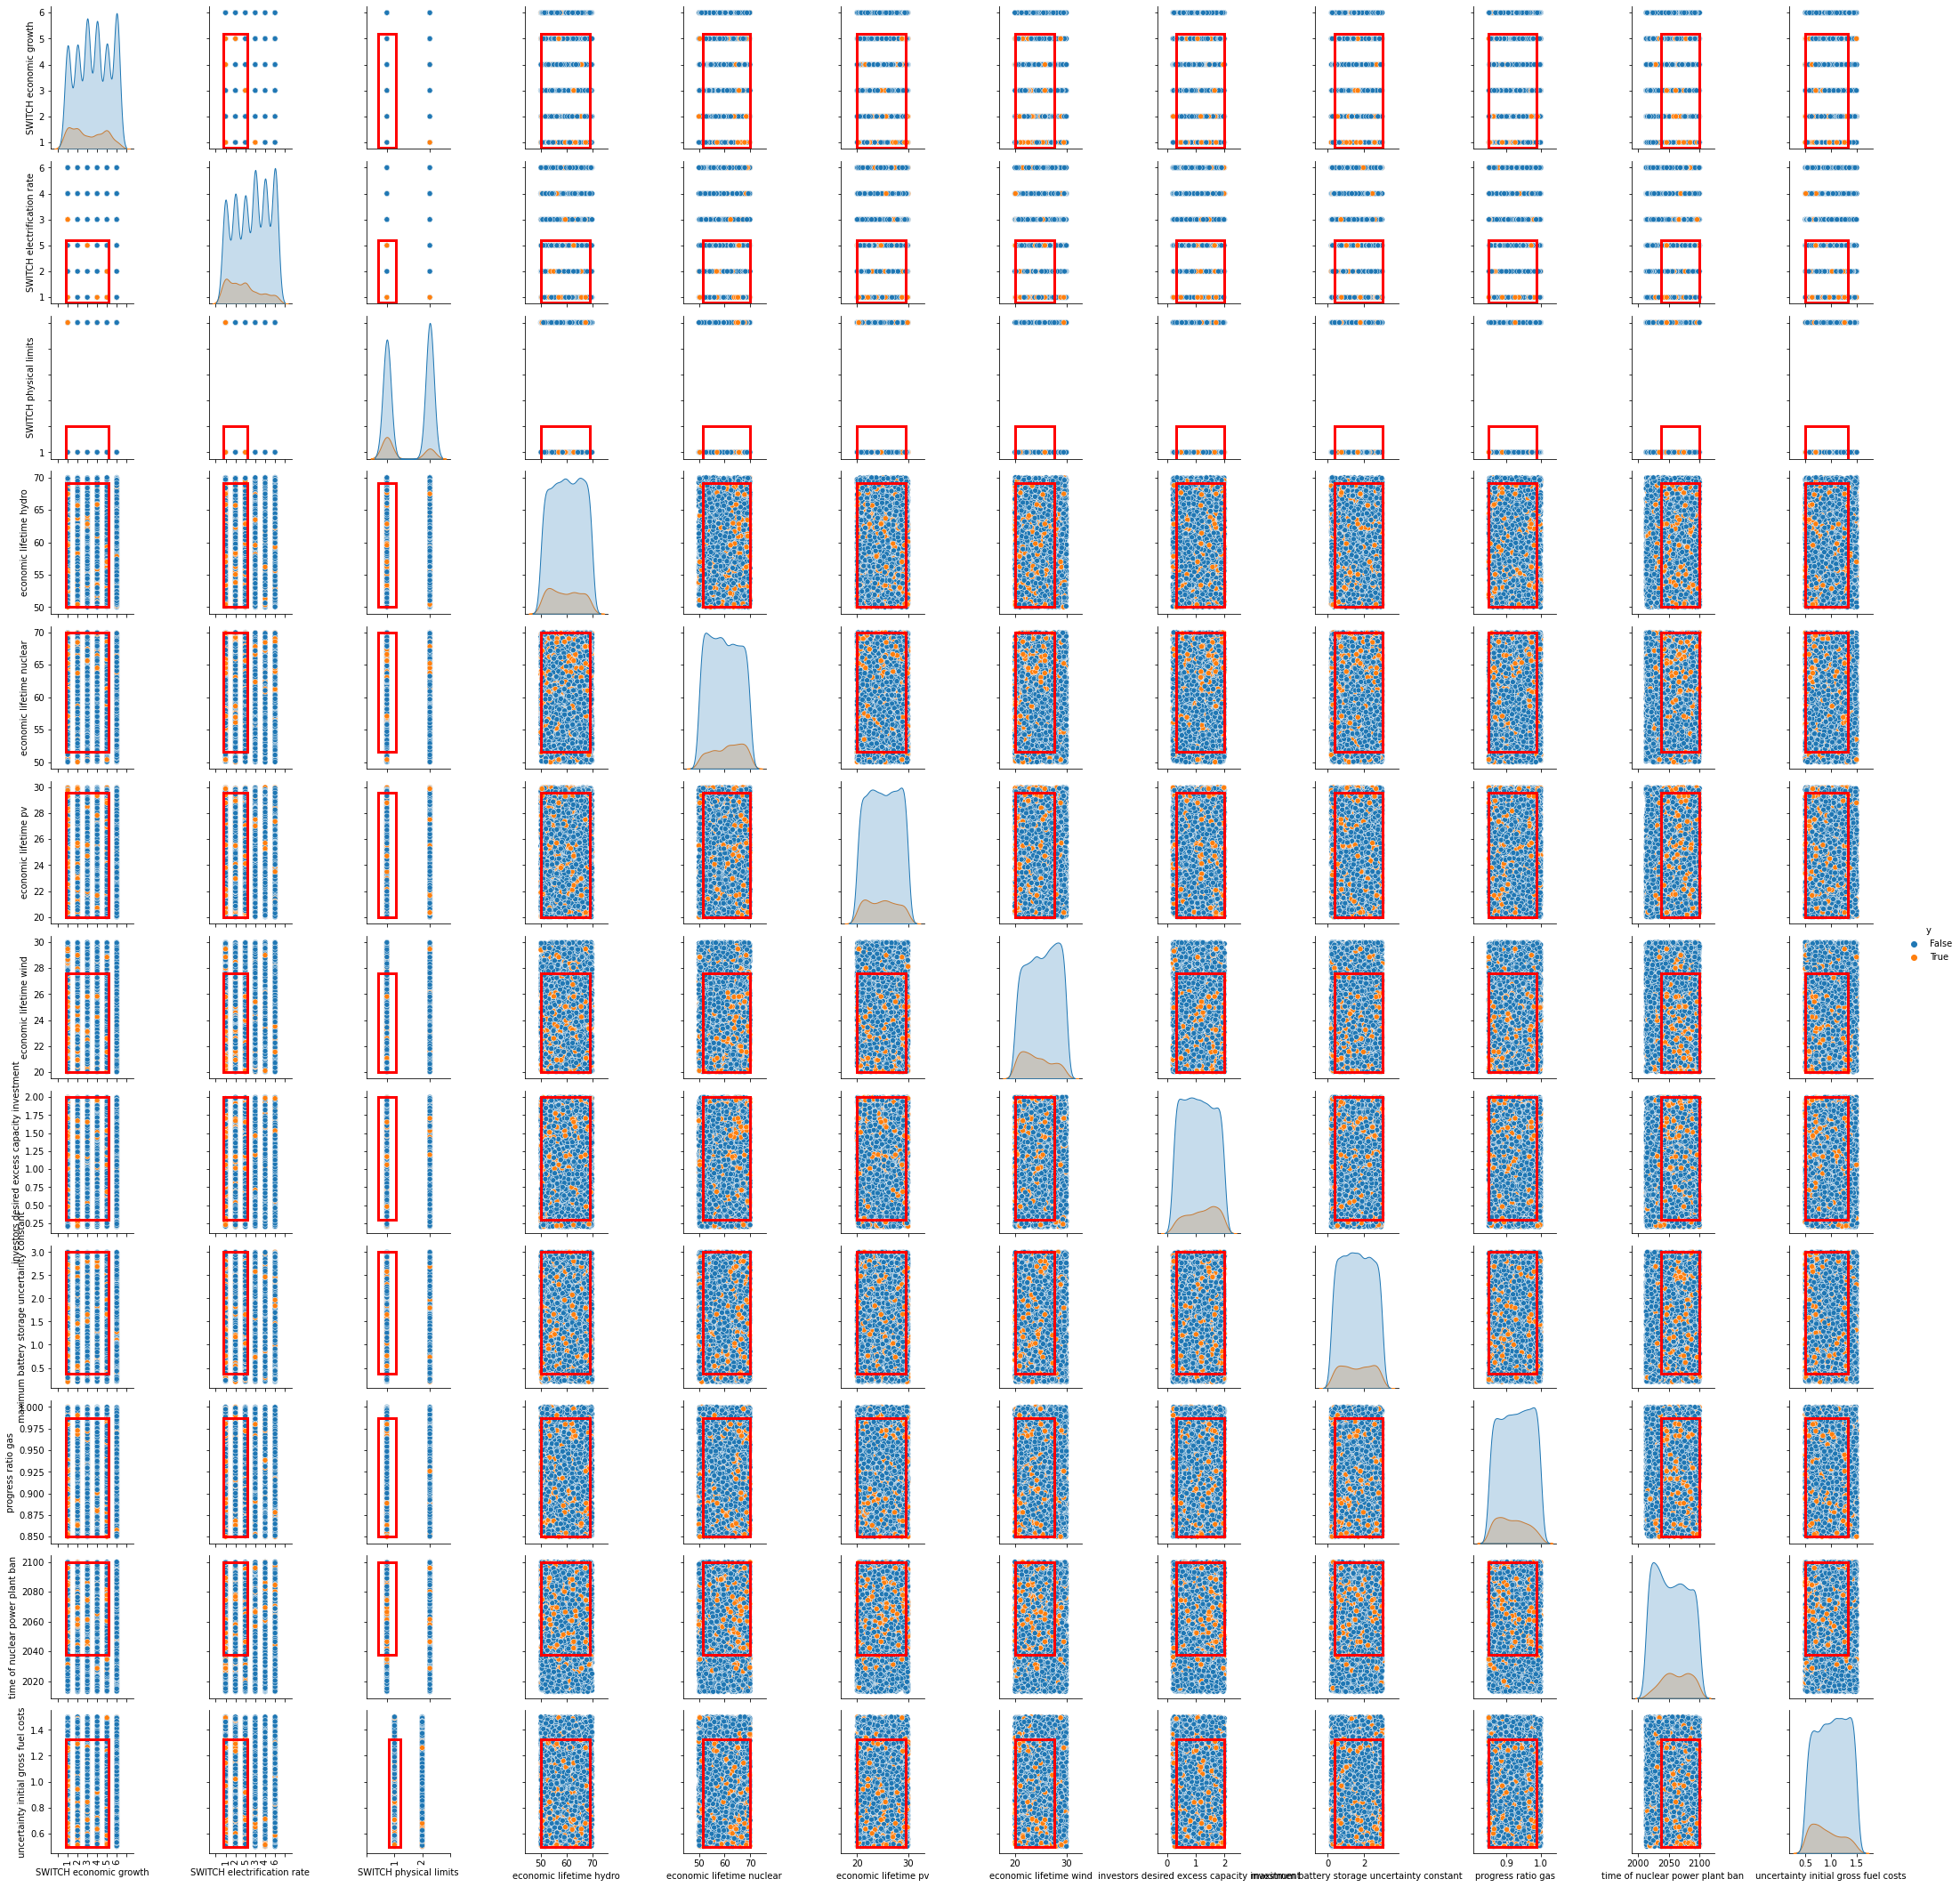

In [38]:
boxes[0][1].show_pairs_scatter()
plt.show()

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


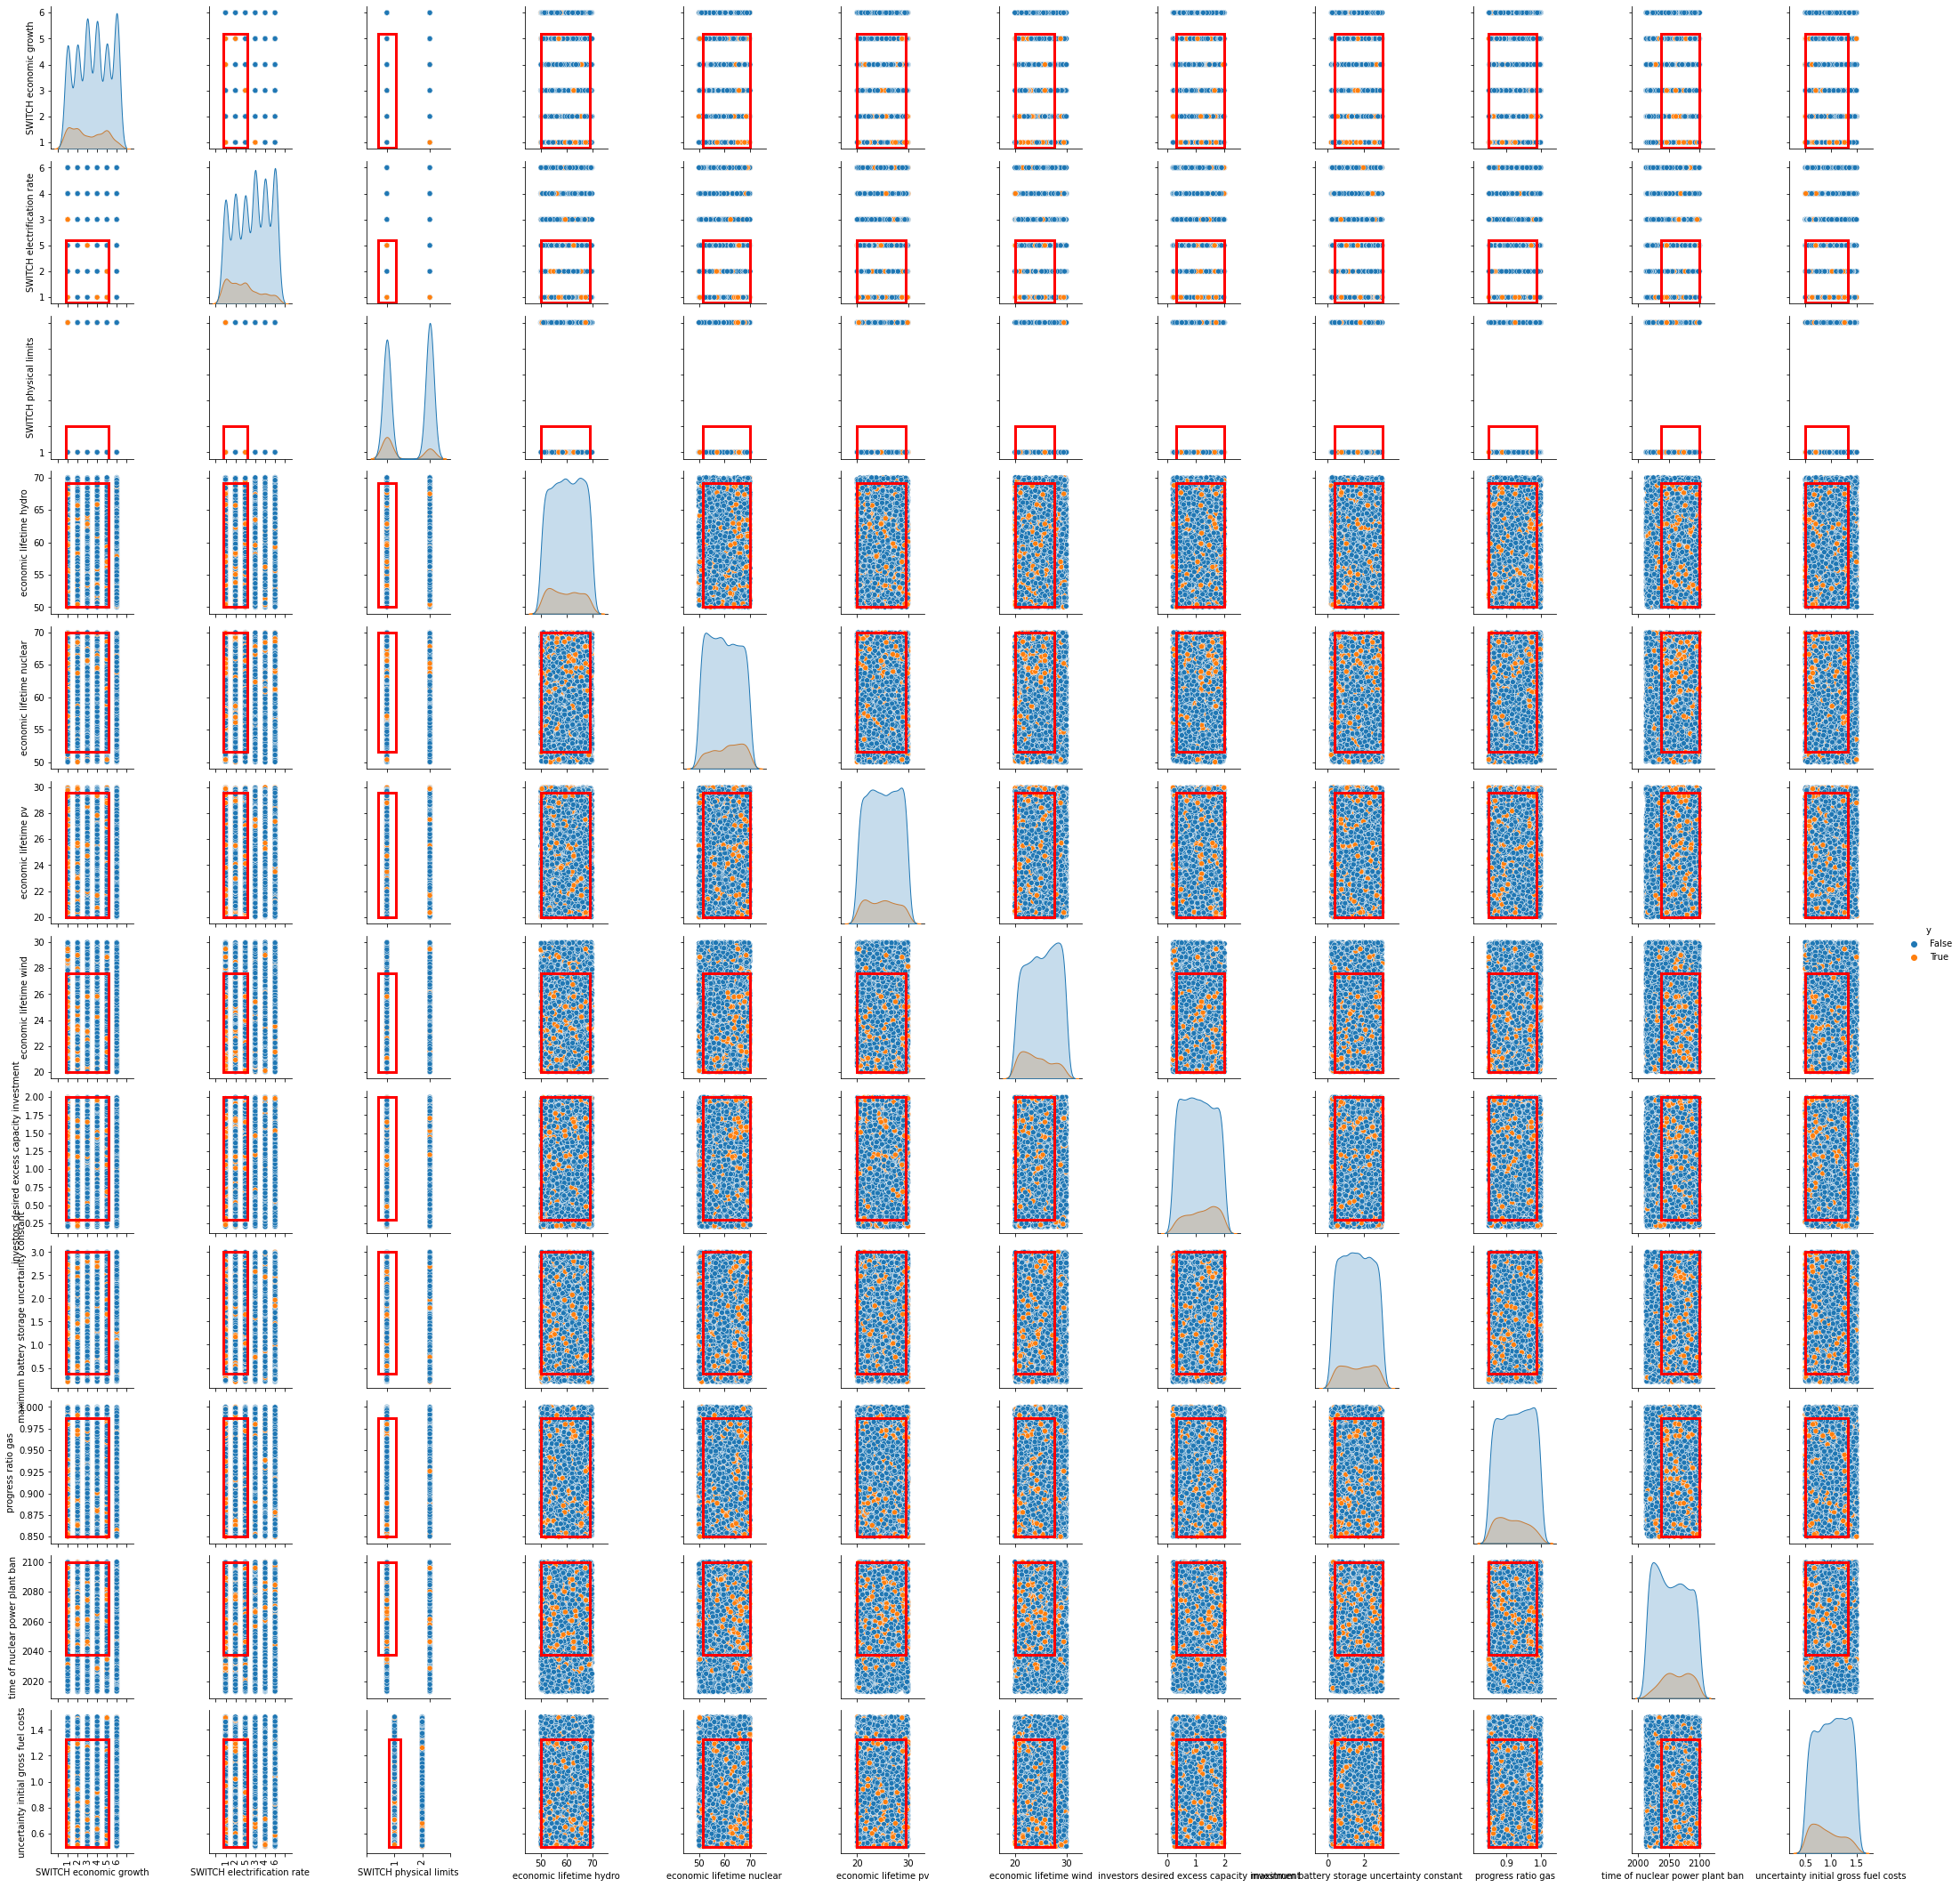

In [39]:
boxes[1][1].show_pairs_scatter()
plt.show()

### PCA preprocessing

In [40]:
experiments_numerical = experiments.select_dtypes(include='number')

In [41]:
rotated_experiments, rotation_matrix = prim.pca_preprocess(experiments_numerical, difference > 0)

In [42]:
experiments_categorical=experiments.select_dtypes(exclude='number')

In [43]:
pca_experiments = pd.concat([rotated_experiments, experiments_categorical],axis=1)

In [44]:
pca_boxes = []
pca_prim_algs = []
for threshold in np.arange(0,0.3,0.1):
    prim_alg = prim.Prim(pca_experiments, difference < 0, threshold=threshold)
    pca_prim_algs.append(prim_alg)
    temp = []
    for iteration in range(iterations):
        temp.append(prim_alg.find_box())
    pca_boxes.append(temp)

Box


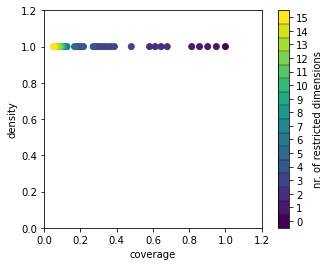

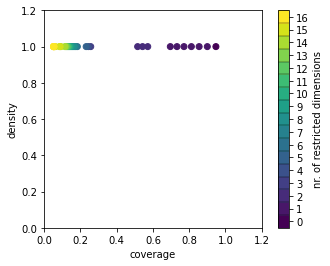

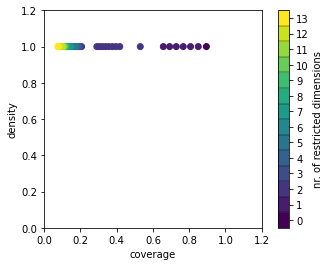

Box


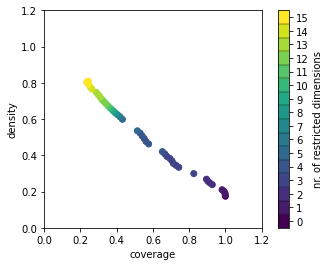

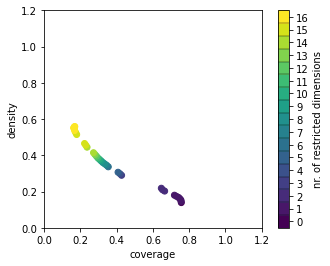

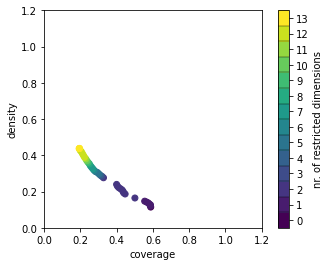

Box


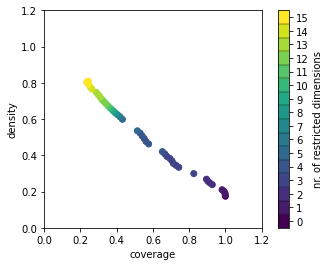

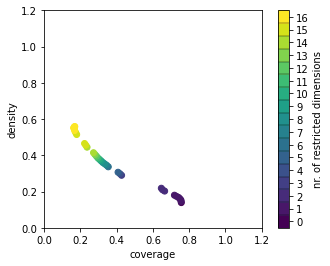

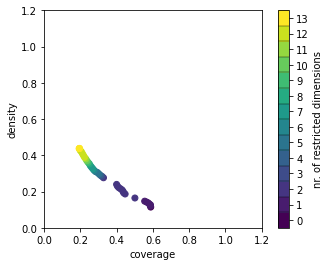

In [45]:
for box in pca_boxes[:3]:
    print("Box")
    for iteration in box:
        iteration.show_tradeoff()
        plt.show()

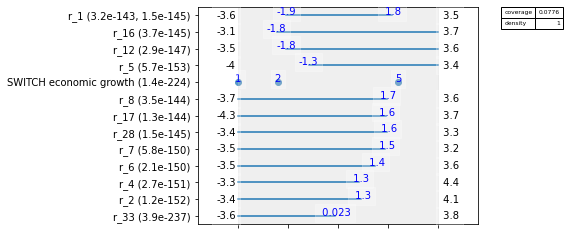

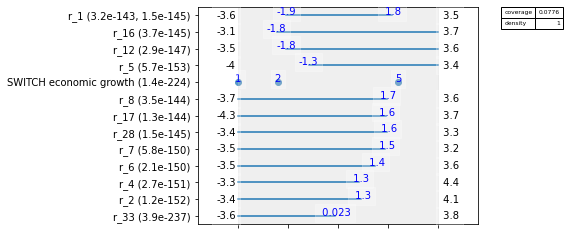

In [46]:
pca_boxes[0][2].inspect(style='graph')

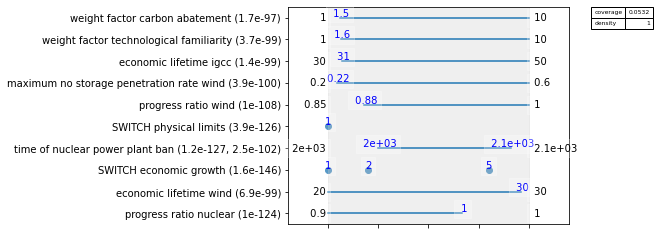

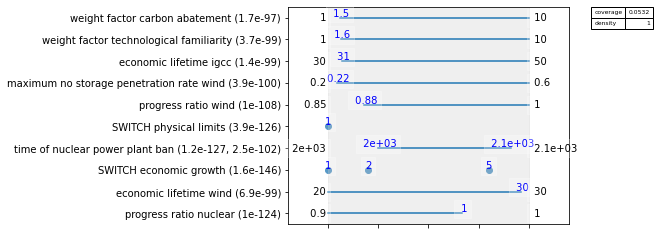

In [47]:
boxes[0][2].inspect(style='graph')

In [48]:
boxes[0][0].inspect_tradeoff()

alt.VConcatChart(...)

In [49]:
pca_boxes[0][0].inspect_tradeoff()

alt.VConcatChart(...)

In [50]:
boxes[1][0].inspect_tradeoff()

alt.VConcatChart(...)

In [51]:
pca_boxes[1][0].inspect_tradeoff()

alt.VConcatChart(...)

<div class="analysis">
    Analysis
</div>